# Airy Function Steepest Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from scipy.special import airy

rcParams.update(mpl.rcParamsDefault)
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20


Consider the Airy Function
$$
\text{Ai}(x) =  \frac{1}{2 \pi} \int_{-\infty}^{\infty} dk \, e^{i (k x + \frac{1}{3} k^3) }
$$
We wish to evaluate it in the asymptotic limit of $x \to + \infty$ (evanescent region or "shadow region") or $x \to - \infty$ (incoming and outgoing solutions).

The core idea of the method of steepest descent is to extend the integrand through analytic continuation to the entire complex plane and then find a more convenient contour in $\mathbb{C}$ on which to evaluate the integral. The path in the complex plane will be made such that it passes through saddle points and therefore the precise contour must be chosen anew for each example we consider.

Assume we have found such a contour $C$, so that we have brought the integral on the form of a complex integral similar to [Eq. 12.107, p. 588 in Arfken (7th edition)]:
$$
f(t) = \int_{C} g(z,t) F(z, t) dz
$$
With $t = x$ and
$$
g(z,t) = \frac{1}{2 \pi}, \quad
F(z, t) = e^{w(z, t)}, \quad
w(z,t) = i \left(z \, t + \frac{1}{3} z^3 \right)
$$
**Check that $w(z,t)$ is analytic**

First we verify, that $w(z, t)$ is analytic. Note, I have interchanged $x$ with $t$, so that we can now use $x$ to denote the real part of $z$ as in $z = x + i y$. We can transform $w$ to rectangular form and see that the real and imaginary parts of $w$ are:
$$
u(x,y, t) := \text{Re}(w(x,y, t)) = \frac{y^3}{3} - x^2 y - t y \\[1em]
v(x,y,t) := \text{Im}(w(x,y, t)) = \frac{x^3}{3} - x y^2 + t x.
$$
Since $w(z,t)$ is a polynomial with only integer powers, it is analytic. We can also check directly that it satisfies the Cauchy Riemann conditions:
$$
\partial_x u = - 2 x y = \partial_y v = - 2 xy \\
\partial_y u = y^2 - x^2 - t = - \partial_x v = - x^2 + y^2 - t.
$$

**Method of Steepest Descent**

For the method of steepest descent we need the derivatives.
$$
w'(z,t) = i \left( t + z^2 \right) \\
w''(z,t) = 2 i z
$$
The saddle points then are:
$$
w'(z_*,t) = 0 \Leftrightarrow z_* = \pm \sqrt{- t} = \pm \sqrt{- \text{sgn}(t)} \sqrt{|t|}
$$
And $w(x,t)$ and $w''(z,t)$ at the saddle points are:
$$
w''(z_*,t) = \pm 2 i \sqrt{- \text{sgn}(t)} \sqrt{|t|}
$$

**Stationary Phase Approximation**

In the stationary phase approximation (a.k.a. saddle point approximation), we approximate $f(t)$ by Taylor-expanding it near saddle points $z_1, \cdots, z_n$ and extending the integrals to $\pm \infty$. We then get:
$$
f(t) \approx \sum_{j=1}^{n} g(z_j, t) e^{w(z_j, t)} e^{i \theta_j} \sqrt{\frac{2\pi}{|w''(z_i, t)|}}.
$$

## Limit $x \to - \infty$

In the region of propagation with $x < 0$ we have $\sqrt{- \text{sgn}(t)} = 1$. The saddle points are therefore:
$$
z_1 = \sqrt{|t|}, \quad z_2 = -\sqrt{|t|}
$$
And we have:
$$
w(z_1, t)
= - i \frac{2}{3} |t|^{\frac{3}{2}},
\qquad
w(z_2, t)
= i \frac{2}{3} |t|^{\frac{3}{2}}. \\
$$
The corresponding phases of $w''(z_1)$ and $w''(z_2)$ are therefore:
$$
\alpha_1 = \text{arg} \, w''(z_1) = \frac{\pi}{2}, \quad \alpha_2 = \text{arg} \, w''(z_2) = \frac{3\pi}{2}
$$

Which gives the following directions of steepest descent:
$$
\theta_1 =  - \frac{\alpha_1}{2} + \frac{\pi}{2} = \frac{\pi}{4} \\[1em]
\theta_2 =  - \frac{\alpha_2}{2} + \frac{\pi}{2} = - \frac{\pi}{4}
$$
The situation is illustrated below:

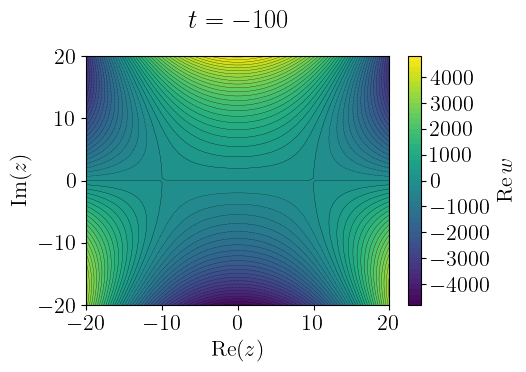

In [92]:
def w(z_R, z_I, t):
    z = z_R + 1j*z_I
    return 1j*(z * t + (z**3)/3)

fig = plt.figure(figsize=(5.5,4))
t = -100
z_R = np.linspace(-2*np.sqrt(np.abs(t)),2*np.sqrt(np.abs(t)))
z_I = np.linspace(-2*np.sqrt(np.abs(t)),2*np.sqrt(np.abs(t)))
Z_R, Z_I = np.meshgrid(z_R, z_I)
levels = 50
cplot = plt.contourf(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), levels=levels)
plt.contour(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), colors='k', linewidths=0.2, levels=levels)
fig.colorbar(cplot, label=r'$\mathrm{Re} \, w $', ax=plt.gca())
plt.xlabel(r'$\mathrm{Re}(z)$')
plt.ylabel(r'$\mathrm{Im}(z)$')
plt.title(r'$t = ' + str(t) + '$')
plt.tight_layout()
plt.show()

In the saddle point approximation we therefore obtain:
$$
f(t) \approx \frac{1}{2 \pi} \left(
    e^{- i \frac{2}{3} |t|^{3/2} } e^{i \pi/4} \sqrt{\frac{2 \pi}{2 \sqrt{|t|}} } +
    e^{i \frac{2}{3} |t|^{3/2} } e^{-i \pi/4} \sqrt{\frac{2 \pi}{2 \sqrt{|t|}} }
\right) \\
= \pi^{- 1/2} |t|^{-1/4} \frac{1}{2} \left( e^{i \left( \frac{2}{3} |t|^{3/2} - \pi/4 \right)} + e^{- i \left( \frac{2}{3} |t|^{3/2} - \pi/4 \right)}  \right) \\
= \pi^{- 1/2} |t|^{-1/4} \frac{1}{2} e^{-i \pi/2} \left( e^{i \left( \frac{2}{3} |t|^{3/2} + \pi/4 \right)} + e^{i \pi} e^{- i \left( \frac{2}{3} |t|^{3/2} + \pi/4 \right)}  \right) \\
$$
Finally, inserting $x=t$ we get:
$$
\text{Ai}(x) \approx \pi^{- 1/2} |t|^{-1/4} \sin \left(\frac{2}{3} |t|^{3/2} + \frac{\pi}{4} \right)
\quad \text{in limit } x \to -\infty
$$
This corresponds to the standard GO expression (see e.g. Tracy et al. Appendix (Potpourri of ...) or Donelly)

## Evanescent Far Field Limit $x \to + \infty$

In the evanescent region with $x > 0$ we have $\sqrt{- \text{sgn}(t)} = i$. The saddle points are therefore:
$$
z_1 = i \sqrt{|t|}, \quad z_2 = -i \sqrt{|t|}
$$

The corresponding phases of $w''(z_1)$ and $w''(z_2)$ are therefore:
$$
\alpha_1 = \text{arg} \, w''(z_1) = \pi, \quad \alpha_2 = \text{arg} \, w''(z_2) = 0
$$

Which gives the following directions of steepest descent:
$$
\theta_1 =  - \frac{\alpha_1}{2} + \frac{\pi}{2} = 0 \\[1em]
\theta_2 =  - \frac{\alpha_2}{2} + \frac{\pi}{2} = \frac{\pi}{2}
$$
The situation is illustrated below:

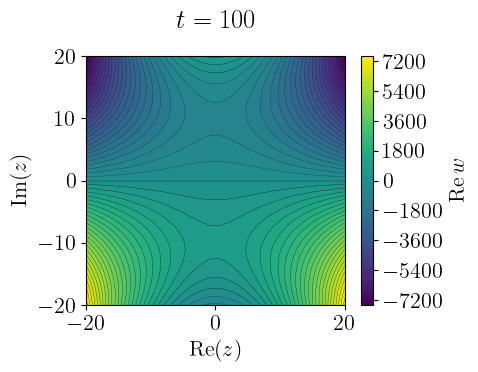

In [93]:
def w(z_R, z_I, t):
    z = z_R + 1j*z_I
    return 1j*(z * t + (z**3)/3)

# # Uncomment to check that our expressions for u and v are correct.
# def u(z_R, z_I, t):
#     return z_I**3/3 - z_R**2 * z_I - t * z_I

# def v(z_R, z_I, t):
#     return z_R**3/3 - z_R * z_I**2 + t * z_R

# def w(z_R, z_I, t):
#     return u(z_R, z_I, t) + 1j*v(z_R, z_I, t)

fig = plt.figure(figsize=(5,4))
t = 100
z_R = np.linspace(-2*np.sqrt(t),2*np.sqrt(t))
z_I = np.linspace(-2*np.sqrt(t),2*np.sqrt(t))
Z_R, Z_I = np.meshgrid(z_R, z_I)
levels = 50
cplot = plt.contourf(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), levels=levels)
plt.contour(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), colors='k', linewidths=0.2, levels=levels)
fig.colorbar(cplot, label=r'$\mathrm{Re} \, w $', ax=plt.gca())
plt.xlabel(r'$\mathrm{Re}(z)$')
plt.ylabel(r'$\mathrm{Im}(z)$')
plt.title(r'$t = ' + str(t) + '$')
plt.tight_layout()
plt.show()

In [152]:
# xlabels = [r'$-\infty$', r'$0$', r'$\infty$']
# # ylabels = [r'$-\infty$', r'$-i \sqrt{|x|}$', r'$i \sqrt{|x|}$', r'$\infty$']
# ylabels = [r'$-i \sqrt{|x|}$', r'$0$', r'$i \sqrt{|x|}$']

# zs = [1j*np.sqrt(t), -1j*np.sqrt(t)]
# plt.figure(figsize=(6, 4))

# z_max = np.max(np.abs(zs))
# xmin, xmax, ymin, ymax = (-2*z_max, 2*z_max, -2*z_max, 2*z_max)
# xticks = [xmin, 0, xmax]
# yticks = [0]
# for z_0 in zs:
#     x_0 = np.real(z_0)
#     y_0 = np.imag(z_0)

#     plt.plot(x_0, y_0, 'k.')
#     plt.plot(x_0, y_0, -np.sqrt(np.abs(t)), 'k.')
#     if x_0 not in xticks:
#         xticks.append(x_0)
#     if y_0 not in yticks:
#         yticks.append(y_0)
# xticks.sort()
# yticks.sort()

# # plt.grid()
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
# plt.xticks(xticks, labels=xlabels)
# plt.yticks(yticks, labels=ylabels)

# plt.plot([xmin, xmax], [0, 0], 'k')
# plt.grid()

# plt.show()

Since the directions of steepest descents (given by $\theta_1, \theta_2$) are perpendicular to each other, we only need the contribution from the first saddle point $z_1$. (An infinitesimal detour to pick up $z_2$ contributes nothing to the integral). See hand drawing for further explanation.

In the far field limit $x \to \infty$ we then get:
$$
\text{Ai}(x) = \frac{1}{2 \pi} e^{w(z_1,t)} e^{i \theta_1} \sqrt{\frac{2 \pi}{|w''(z_1,t)|}}.
$$
We have:
$$
w(z_1,t)
= w(i \sqrt{t}, t)
= i \left( i \sqrt{t} t + \frac{\left( i \sqrt{t} \right)^3}{3} \right)
= - t^{\frac{3}{2}} + \frac{1}{3} t^{\frac{3}{2}}
= - \frac{2}{3} t^{\frac{3}{2}}
$$
$$
|w''(z_1,t)| = 2 \sqrt{t}
$$
Therefore the Airy function in this limit is:
$$
\text{Ai}(x)  \approx \frac{1}{2} \pi^{-\frac{1}{2}} x^{- 1 / 4} e^{- 2 / 3 x^{\frac{3}{2}}}
\quad \text{in limit } x \to \infty
$$

### Plot of Approximation

The approximation with both limits for $x <0$ and $x > 0$ is plotted below together with the exact Airy function.

In [165]:
from scipy.special import airy

def Ai(x):
    ai, *_ = airy(x)
    return ai

def Bi(x):
    _, _, bi, _ = airy(x)
    return bi

q = np.linspace(-10, 10, 1000)
E_ex = Ai(q) # Exact solution is Airy function
E_GO_neg = lambda x: np.pi**(-1/2) * (np.abs(x)**(-1/4)) * np.sin(2/3 * np.abs(x)**(3/2) + np.pi/4) # GO Solution
E_GO_pos = lambda x: 1/2 * np.pi**(- 1/2) * (x)**(-1/4) * np.exp(- 2/3 * x**(3/2))

E_GO = np.piecewise(q, [q < 0, q >= 0], [E_GO_neg, E_GO_pos])

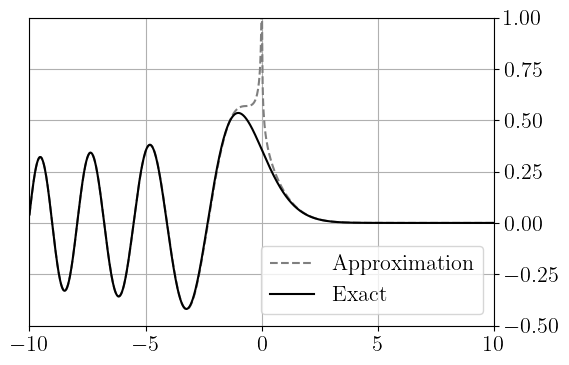

In [166]:
plt.figure(figsize=(6,4))
plt.plot(q, E_GO, '--', color='tab:grey', label='Approximation')
plt.plot(q, E_ex, '-', color='black', label='Exact')
plt.grid()
plt.xlim(-10,10)
plt.ylim(-0.5,1)
plt.legend()
ax = plt.gca()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.show()

## Page 167 in "Numerical Methods for Special Functions" by Gil et. al

In Gil et al they consider yet another contour to evaluate the Airy Function
$$
\text{Ai}(z) = \frac{1}{2 \pi i} \int_{-\infty}^{\infty} e^{1/3 \kappa^3 - z \kappa} d \kappa
$$
Note, they consider not only the values $z=x \in \mathbb{R}$, but generalize to complex $z$ with phase: $\text{arg} \, z \in [0, \frac{2\pi}{3}]$. So negative real $x$ are not covered by their example, but instead covered by the connection formula:
$$
\text{Ai}(z) + e^{-2\pi/3} \text{Ai}(z e^{-2\pi/3}) + e^{2\pi/3} \text{Ai}(z e^{2\pi/3}) = 0
$$

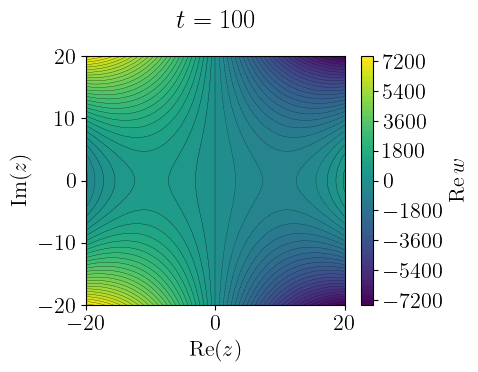

In [3]:
def w(z_R, z_I, t):
    z = z_R + 1j*z_I
    return 1/3 * (z**3) - t*z

fig = plt.figure(figsize=(5,4))
t = 100
z_R = np.linspace(-2*np.sqrt(t),2*np.sqrt(t))
z_I = np.linspace(-2*np.sqrt(t),2*np.sqrt(t))
Z_R, Z_I = np.meshgrid(z_R, z_I)
levels = 50
cplot = plt.contourf(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), levels=levels)
plt.contour(Z_R, Z_I, np.real(w(Z_R, Z_I, t)), colors='k', linewidths=0.2, levels=levels)
fig.colorbar(cplot, label=r'$\mathrm{Re} \, w $', ax=plt.gca())
plt.xlabel(r'$\mathrm{Re}(z)$')
plt.ylabel(r'$\mathrm{Im}(z)$')
plt.title(r'$t = ' + str(t) + '$')
plt.tight_layout()
plt.show()